<a href="https://colab.research.google.com/github/JayanneAzevedo/Data_Science_Projects/blob/main/Electric_Power_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electric Power Customers - KMeans Clustering**

Household power consumption varies with the different regions in each country. However, certainly there are similar consumption groups regardless of location. In this notebook, I will cluster customers accordingly to consumption profiles using the KMeans method.

frank-pereira-PG38l-kFVn0-unsplash.jpg

# **Data Collection**

This dataset is from France and it is available on [Kaggle](https://https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set).

**Attribute Information:**


*   **date**: Date in format dd/mm/yyyy
*  **time**: time in format hh:mm:ss
*   **global_active_power**: household global minute-averaged active power (in kilowatt)
*   **global_reactive_power**: household global minute-averaged reactive power (in kilowatt)
*   **voltage**: minute-averaged voltage (in volt)
*   **global_intensity**: household global minute-averaged current intensity (in ampere)
*   **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
*   **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy).It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
*   **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



## **Exploratory Data Analysis**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:
# Loading dataset
df = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)

In [ ]:
# Top 5 records
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [ ]:
# Dataset shape
df.shape

(2075259, 9)

In [ ]:
# Variables types
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Checking missing values
df.isnull().values.any()

True

In [ ]:
# Checking missing values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

## **Data Pre-Processing**

In [ ]:
# Removing missing values and dropping 2 first columns (not needed for this data analysis)
df = df.iloc[0:, 2:9].dropna()

In [ ]:
# Top 5 records
df.head()

Global_active_power Global_reactive_power  Voltage Global_intensity  \
0               4.216                 0.418  234.840           18.400   
1               5.360                 0.436  233.630           23.000   
2               5.374                 0.498  233.290           23.000   
3               5.388                 0.502  233.740           23.000   
4               3.666                 0.528  235.680           15.800   

  Sub_metering_1 Sub_metering_2  Sub_metering_3  
0          0.000          1.000            17.0  
1          0.000          1.000            16.0  
2          0.000          2.000            17.0  
3          0.000          1.000            17.0  
4          0.000          1.000            17.0

In [ ]:
# Checking missing values
df.isnull().values.any()

False

In [ ]:
# Checking missing values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# Transforming variables values in array
df_atrib = df.values

In [ ]:
# Printing array
df_atrib 

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [ ]:
# Splitting sample of 1% from dataset to avoid computer memory issues
df, sample2 = train_test_split(df_atrib, train_size=.01)

In [ ]:
df.shape

(20492, 7)

## **Model Training**

### **PCA Model**

I will use PCA to reduce the number of variables, as it will define which are the most important variables to explain the model.

In [ ]:
# Applying PCA to reduce dimensions in arrays
pca = PCA(n_components=2).fit_transform(df)

In [ ]:
# Determination of range (hyperparameter "K" of KMeans) based on business needs
k_range = range(1,12)
k_range

range(1, 12)

In [ ]:
# Aplying KMeans model for each k value
k_means_var = [KMeans(n_clusters= k).fit(pca) for k in k_range]

### **Elbow Curve**

The Elbow Curve Method will help decide which is the ideal number of K to use.

In [ ]:
# Adjusting cluster centroid for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculating euclidean distance from each point to centroid
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Sum of squares for distances in cluster
sum_squares_intra_cluster = [sum(d**2) for d in dist]

# Total sum of squares
sum_total = sum(pdist(pca)**2)/pca.shape[0]

# Sum of squares between clusters
sum_squares_inter_cluster = sum_total - sum_squares_intra_cluster

# Elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, sum_squares_inter_cluster/sum_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Percent of Variance Explained (%)')
plt.title('Elbow Method Cluster Selection Result')

Text(0.5, 1.0, 'Elbow Method Cluster Selection Result')

### **Model with K = 8**

In [ ]:
# Creating model with k = 8
model_1 = KMeans(n_clusters=8)
model_1.fit(pca)

KMeans()

### **Model Evaluation**

In [ ]:
# Obtain min and max values and organize the shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() -1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() +5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max))
Z = model_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

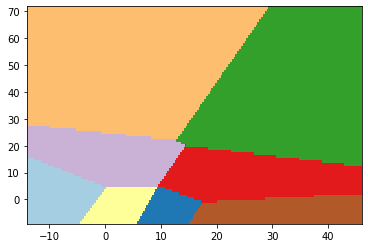

In [ ]:
# Plotting cluster areas
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin = 'lower')

In [ ]:
# Evaluation metric for cluster method
?silhouette_score
# The best value is 1 and the worst value is -1

**Model 1 with K = 8**

In [ ]:
# Silhouette Score
labels = model_1.labels_

silhouette_score(pca, labels, metric = 'euclidean')

0.8134854830882735

**Model 1 with K = 9**

In [ ]:
# Creating model with k = 9
model_2 = KMeans(n_clusters=9)
model_2.fit(pca)

KMeans(n_clusters=9)

In [ ]:
# Silhouette Score
labels = model_2.labels_

silhouette_score(pca, labels, metric = 'euclidean')

0.6819001501205393

**Model 1 with K = 10**

In [ ]:
# Creating model with k = 10
model_3 = KMeans(n_clusters=10)
model_3.fit(pca)

KMeans(n_clusters=10)

In [ ]:
# Silhouette Score
labels = model_3.labels_

silhouette_score(pca, labels, metric = 'euclidean')

0.6748590475028804

The best value of silhouette score was from model with K = 8.

# **Using Clusters on Dataset**

In [ ]:
# Listing column names
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [ ]:
# Including clusters on dataset
cluster_map = pd.DataFrame(df, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = model_1.labels_
cluster_map

Global_active_power Global_reactive_power  Voltage Global_intensity  \
0                    0.320                 0.092  240.040            1.400   
1                    2.000                 0.162  242.900            8.600   
2                    1.408                 0.226  239.910            5.800   
3                    0.254                 0.000  241.860            1.000   
4                    0.344                 0.084  238.380            1.400   
...                    ...                   ...      ...              ...   
20487                0.348                 0.192  233.480            1.600   
20488                0.136                 0.000  242.440            0.600   
20489                0.126                 0.000  239.480            0.600   
20490                0.926                 0.298  241.030            4.000   
20491                1.396                 0.086  241.200            5.800   

      Sub_metering_1 Sub_metering_2 Sub_metering_3  cluster  
0              0.000          0.000            0.0        0  
1              0.000          0.000            0.0        0  
2              0.000          0.000            0.0        0  
3              0.000          0.000            1.0        0  
4              0.000          1.000            0.0        0  
...              ...            ...            ...      ...  
20487          0.000          0.000            0.0        0  
20488          0.000          0.000            1.0        0  
20489          0.000          0.000            0.0        0  
20490          0.000          0.000           12.0        6  
20491          0.000          0.000           18.0        1  

[20492 rows x 8 columns]

In [ ]:
# Calculating the electric power consumption mean by cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.509435
1    1.805976
2    4.569542
3    3.829064
4    3.292745
5    2.746258
6    1.077978
7    2.417073
Name: Global_active_power, dtype: float64

After this analysis, it is possible to explore the results to obtain other relevant information, such as predicting customer groups, setting a detailed profile consumption for each group, and so on.